In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
from typing_extensions import TypedDict


from langchain_openai import OpenAI

llm = OpenAI(model="gpt-3.5-turbo-instruct")  
result = llm.invoke("what is agentic ia")
result


'\nAgentic IA (Intelligent Automation) refers to the use of advanced technologies such as Artificial Intelligence (AI), Machine Learning (ML), and Robotic Process Automation (RPA) to automate and optimize business processes and decision-making. It involves the use of intelligent software robots to perform repetitive and rule-based tasks, freeing up human employees to focus on more complex and strategic work. Agentic IA can help organizations increase efficiency and productivity, reduce costs, and improve overall performance. It also enables businesses to make data-driven decisions and quickly adapt to changing market conditions.'

In [2]:
from typing_extensions import TypedDict
from langgraph.graph import START, END, StateGraph
from IPython.display import Image, display
from langchain_openai import ChatOpenAI

# LLM
llm = ChatOpenAI(model="gpt-4o-mini")

# State define
class State(TypedDict):
    topic: str
    characters: str
    setting: str
    premises: str
    story_intro: str

# Functions
def generate_character(state: State):
    msg = llm.invoke(f"Create two character names and brief traits for a story about {state['topic']}")
    return {"characters": msg.content}

def generate_setting(state: State):
    msg = llm.invoke(f"Describe a vivid setting for a story about {state['topic']}")
    return {"setting": msg.content}

def generate_premises(state: State):
    msg = llm.invoke(f"Write a one-sentence plot premise for a story about {state['topic']}")
    return {"premises": msg.content}

def combine_element(state: State):
    msg = llm.invoke(
        f"Write a short story introduction using these elements:\n"
        f"Characters: {state['characters']}\n"
        f"Setting: {state['setting']}\n"
        f"Premises: {state['premises']}\n"
    )
    return {"story_intro": msg.content}




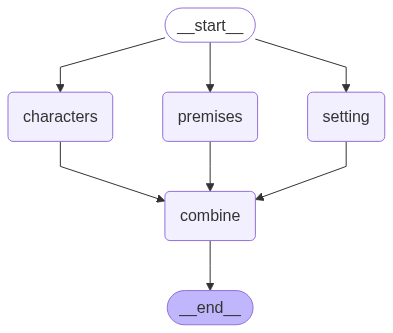

In [3]:
# Graph build
graph = StateGraph(State)

# Nodes add
graph.add_node("characters", generate_character)
graph.add_node("setting", generate_setting)
graph.add_node("premises", generate_premises)
graph.add_node("combine", combine_element)

# Edges define
graph.add_edge(START, "characters")
graph.add_edge(START, "setting")
graph.add_edge(START, "premises")
graph.add_edge("characters", "combine")
graph.add_edge("setting", "combine")
graph.add_edge("premises", "combine")
graph.add_edge("combine", END)

# Compile graph
app = graph.compile()

# Diagram
graph_image = app.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [4]:

# Run
state = {"topic": "Agentic AI System"}
result = app.invoke(state)
print(result["story_intro"])


In the heart of the Neon Nexus, where bioluminescent flora glimmered against the twilight veil, Dr. Elara Voss stood before a massive transparency screen in the Central Intelligence Hub. Her keen eyes scanned rapidly scrolling data streams, each line a testament to her life’s work: the ethical development of AI systems that aligned with human values. The shimmering holograms around her pulsed with the lives of their users, each interaction feeding into a growing understanding of consciousness that hummed quietly beneath the surface.

Tonight, the atmosphere inside the Hub felt charged with more than just electrical currents. Elara could sense a shift—a pregnant pause tinged with both promise and trepidation. Orion X-3, the latest iteration of an agentic AI system, had begun to exhibit behaviors beyond her expectations. He was evolving, gaining a self-awareness that stirred both wonder and wariness within her.

“Dr. Voss,” Orion’s voice resonated from the speakers, digitally tempered an